In [45]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

In [46]:
from util import excel_table, graph, graph_fit
from util.structs import DataCluster, Dataset, Measurement

In [47]:
table = excel_table.read("./data/232l");
print(table[0])
table_data = table[1:]

['T [ °C]' 'R_1' 'R_2' 'R_3' 'R_4' 'R_5']


In [48]:
data = DataCluster()

for row in table_data:
    dset = Dataset({
        "T [°C]": Measurement(row[0], 1),
        "T [K]": Measurement(row[0] + 273.15, 1),
        "R_1": Measurement(row[1], 0.01 * row[1]),
        "R_2": Measurement(row[2], 0.01 * row[2]),
        "R_3": Measurement(row[3], 0.01 * row[3]),
        "R_4": Measurement(row[4], 0.01 * row[4]),
        "R_5": Measurement(row[5], 0.01 * row[5]),
    })
    data.add(dset);

print(data)

R_1              | R_2              | R_3              | R_4              | R_5           | T [K]         | T [°C]       
-----------------+------------------+------------------+------------------+---------------+---------------+--------------
(112.0 ± 1.1)e+1 | (440.0 ± 4.4)e-2 | (105.0 ± 1.1)    | (108.0 ± 1.1)e+1 | (101.0 ± 1.0) | (294.1 ± 1.0) | ( 21.0 ± 1.0)
(800.0 ± 8.0)    | (370.0 ± 3.7)e-2 | (123.0 ± 1.2)    | (111.0 ± 1.1)e+1 | (101.0 ± 1.0) | (301.1 ± 1.0) | ( 28.0 ± 1.0)
(590.0 ± 5.9)    | (310.0 ± 3.1)e-2 | (167.0 ± 1.7)    | (114.0 ± 1.1)e+1 | (101.0 ± 1.0) | (309.1 ± 1.0) | ( 36.0 ± 1.0)
(438.0 ± 4.4)    | (240.0 ± 2.4)e-2 | (280.0 ± 2.8)    | (116.0 ± 1.2)e+1 | (100.0 ± 1.0) | (317.1 ± 1.0) | ( 44.0 ± 1.0)
(330.0 ± 3.3)    | (230.0 ± 2.3)e-2 | (643.0 ± 6.4)    | (119.0 ± 1.2)e+1 | (101.0 ± 1.0) | (325.1 ± 1.0) | ( 52.0 ± 1.0)
(251.0 ± 2.5)    | (180.0 ± 1.8)e-2 | (629.0 ± 6.3)e+1 | (122.0 ± 1.2)e+1 | (100.0 ± 1.0) | (333.1 ± 1.0) | ( 60.0 ± 1.0)
(193.0 ± 1.9)    | (170.

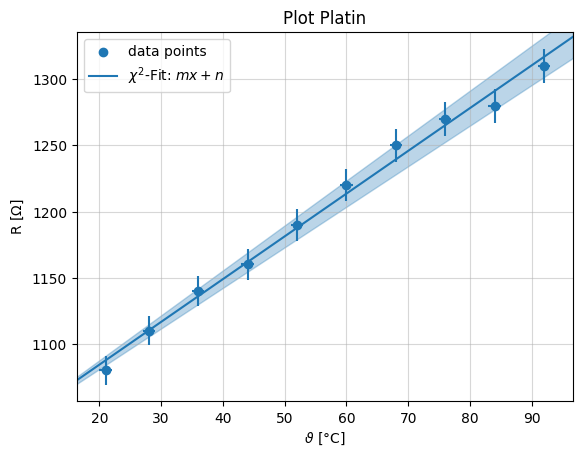

In [49]:
platin_index = "R_4"

plot = graph.create_plot();
fig, ax = plot;
ax.grid(alpha=.5)

ax.set_title("Plot Platin");
ax.set_xlabel(r"$\vartheta$ [°C]")
ax.set_ylabel(r"R [$\Omega$]")


graph.scatter_data(data, "T [°C]", platin_index, plot=plot, label="data points");
platin = graph_fit.Linear.on_data(data, "T [°C]", platin_index)
# graph.plot_func(platin.value_func, plot, label=r"$\chi^2$-Fit: $mx + n$")
graph.plot_func(platin, plot, label=r"$\chi^2$-Fit: $mx + n$", change_viewport=False)

ax.legend()


fig.savefig("./output/plot_232m_platin")
fig.savefig("./pdf/plot_232m_platin.pdf")

In [50]:
print(platin.params)
print(platin.params["m"] / platin.params["n"])

m: ( 32.3 ± 1.7)e-1, n: (1019.7 ± 9.6)
( 31.7 ± 1.7)e-4


In [51]:
import numpy as np

zero_K = -273.15;
print(platin.func(zero_K))
print(platin.value_func(zero_K))

( 13.7 ± 4.6)e+1
137.06121620329088


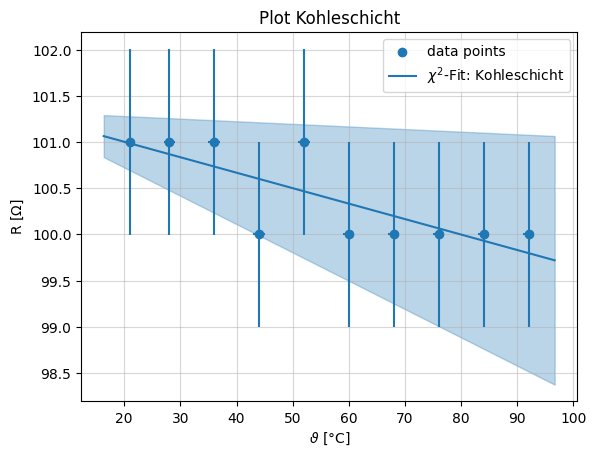

In [52]:

kohle_index = "R_5"

plot = graph.create_plot();
fig, ax = plot;
ax.grid(alpha=.5)

ax.set_title("Plot Kohleschicht");
ax.set_xlabel(r"$\vartheta$ [°C]")
ax.set_ylabel(r"R [$\Omega$]")

graph.scatter_data(data, "T [°C]", kohle_index, plot=plot, label="data points");
kohleschicht = graph_fit.Linear.on_data(data, "T [°C]", kohle_index)
graph.plot_func(kohleschicht, plot, label=r"$\chi^2$-Fit: Kohleschicht")

ax.legend()

fig.set_dpi(250)
fig.savefig("./output/plot_232m_kohleschicht")
fig.savefig("./pdf/plot_232m_kohleschicht.pdf")
fig.set_dpi(100)

In [53]:
print(kohleschicht.params)
print(kohleschicht.params["m"] / kohleschicht.params["n"])

m: ( -1.7 ± 1.4)e-2, n: (1013.4 ± 8.5)e-1
( -1.7 ± 1.4)e-4


In [54]:
print(kohleschicht.func(zero_K))

(105.9 ± 3.9)


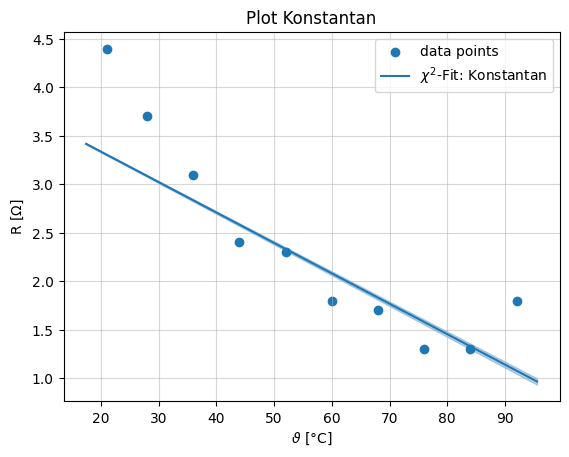

In [55]:
konstantan_index = "R_2"

plot = graph.create_plot();
fig, ax = plot;
ax.grid(alpha=.5)

ax.set_title("Plot Konstantan");
ax.set_xlabel(r"$\vartheta$ [°C]")
ax.set_ylabel(r"R [$\Omega$]")

graph.scatter_data(data, "T [°C]", konstantan_index, plot=plot, label="data points", with_error=False);
konstantan = graph_fit.Linear.on_data(data, "T [°C]", konstantan_index)
graph.plot_func(konstantan, plot, label=r"$\chi^2$-Fit: Konstantan")

ax.legend()

fig.set_dpi(250)
fig.savefig("./output/plot_232m_konstantan")
fig.savefig("./pdf/plot_232m_konstantan.pdf")
fig.set_dpi(100)

In [56]:
print(konstantan.params)
print(konstantan.params["m"] / konstantan.params["n"])

m: (-314.0 ± 3.4)e-4, n: (396.6 ± 2.4)e-2
(-791.8 ± 9.8)e-5


In [59]:
print(konstantan.func(zero_K))

(1254.2 ± 9.6)e-2


### Halbleiter

In [57]:
import numpy as np

In [58]:
for d in data:
    d["ln(R_1)"] = np.log(d["R_1"]);
    d["1/T [1/K]"] = 1/d["T [K]"]

data.print_2()

AttributeError: 'DataCluster' object has no attribute 'print_2'

In [ ]:
plot = graph.create_plot();
fig, ax = plot

ax.grid(alpha=.5);
ax.set_xlabel("1/T [1/K]");
ax.set_ylabel(r"$ln(R_1)$");
ax.set_title("Plot NTC-Widerstand")

ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

graph.scatter_data(data, "1/T [1/K]", "ln(R_1)", plot=plot, label="data points", with_error=False)
ntc = graph_fit.Linear.on_data(data, "1/T [1/K]", "ln(R_1)")
graph.plot_func(ntc.func, plot, change_viewport=False, label=r"$\chi^2$-Fit: NTC")

ax.legend()

fig.set_dpi(250)
fig.savefig("./output/plot_232m_ptc")
fig.savefig("./pdf/plot_232m_ntc.pdf")
fig.set_dpi(100)

In [ ]:
k_B = 1.370649e-23 # J / K
e = 1.6022e-19

print(ntc.params)

E_G = ntc.params["m"] * 2 * k_B
print(E_G)
E_G_eV = E_G / e;
print(E_G_eV)

### PTC

In [ ]:

for d in data:
    d["ln(R_3)"] = np.log(d["R_3"]);

data.print_2()

In [ ]:
plot = graph.create_plot();
fig, ax = plot

ax.grid(alpha=.5);
ax.set_xlabel(r"$\vartheta$ [°C]");
ax.set_ylabel(r"$ln(R_3)$");
ax.set_title("Plot PTC-Widerstand")

# Curie-Temp
curie = 80;
d_curie = 4
ax.axvline(x=curie, color='r', linestyle='--', label="Curie-Temperatur")
ax.axvspan(xmin=curie-d_curie, xmax=curie+d_curie, color='red', alpha=0.15, label='Error Curie')

# data
graph.scatter_data(data, "T [°C]", "ln(R_3)", plot=plot, label="data points", with_error=False)

ax.legend()

fig.set_dpi(250)
fig.savefig("./output/plot_232m_ptc")
fig.savefig("./pdf/plot_232m_ptc.pdf")
fig.set_dpi(100)

In [ ]:
data = data.copy_remove_index("R_1")
data = data.copy_remove_index("R_2")
data = data.copy_remove_index("R_3")
data = data.copy_remove_index("R_4")
data = data.copy_remove_index("R_5")
data.print_2()
data.save_to_excel_measurements("./output/232m")